## SMART-PBL：一秒钟用词云解读政府工作报告

### 1 - 核心代码

In [ ]:
# 需要安装 wordcloud 库
!pip install wordcloud
!pip install jieba

**算法思路：**
- 第一步：抓取一个网页中的所有数据
 - get_html_data(url='http://www.kaikeba.com')
- 第二步：清洗网页中的数据，去掉没有用的标签，提取有意义的文本数据
 - clean_html_data(html='')
- 第三步：对网页中的文本数据进行分词
 - word_segmentation(text='')
- 第四步：加载词云的轮廓图片，生成云图并保存
 - generate_word_cloud(word_counts=None, image_mask=None)

In [ ]:
import requests
import re
import jieba
import collections
import wordcloud                     # 词云展示库
import numpy as np                   # 数据处理库
import matplotlib.pyplot as plt      # 图像展示库
from PIL import Image                # 图像处理库
from html.parser import HTMLParser

def get_html_data(url='http://www.kaikeba.com'):
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    result = requests.get(url, headers=headers)
    html = ''
    if (result.status_code == requests.codes.ok):
        if 'ISO-8859-1' == result.encoding.upper():
            html = result.text.encode('ISO-8859-1')
            html = html.decode('UTF-8')
        else:
            html = result.content.decode(encoding=result.encoding, errors='ignore')    
    return html

def clean_html_data(html=''):
    class MyHTMLParser(HTMLParser):
        title = ''
        tag_list = []
        data = ''
        def handle_starttag(self, tag, attrs):
            self.tag_list.append(tag)
        def handle_endtag(self, tag):
            self.tag_list.pop()
        def handle_data(self, data):
            current_tag = ''
            if len(self.tag_list) != 0:
                current_tag = self.tag_list[len(self.tag_list) - 1]
            if current_tag == 'title':
                self.title = data
            if current_tag == 'p':
                self.data = self.data + data

    # 抓取原始 html 中的核心信息
    parser = MyHTMLParser()
    parser.feed(html)
    
    # 文本预处理
    pattern = re.compile(u'\s*|\t|\n|\.|-|:|;|\)|\(|\?|"'
                         u'|，|。|；|“|”|、|？|！|《|》|：')    # 定义正则表达式匹配模式，**英文不能去掉空格
    string_data = re.sub(pattern, '', parser.data)           # 将符合模式的字符去除
    return [parser.title, string_data]

def word_segmentation(text=''):
    # 文本分词
    seg_list_exact = jieba.cut(text, cut_all = False)        # cut_all=False 是精确模式分词
    # Create stopword list:
    object_list = []
    remove_words = [u'的', u'，', u'和', u'是', u'中', u'在', u'了', u'各', u'有',
                    u'对', u'等', u'能', u'都', u'。', u'要', u'、', u'我', u'用',
                    u'对于', u'随着', u'通常', u'如果', u'我们', u'需要', u' '] # 自定义去除词库

    for word in seg_list_exact:                              # 循环读出每个分词
        if word not in remove_words:                         # 如果不在去除词库中
            object_list.append(word)                         # 分词追加到列表
    word_counts = collections.Counter(object_list)           # 对分词做词频统计
    return word_counts

def generate_word_cloud(word_counts=None, image_mask=None):
    # 词频展示
    wc_mask = np.array(image_mask)                           # 定义词频背景
    wc = wordcloud.WordCloud(
        font_path='design/buzz_cloud_font.ttf',              # 设置字体格式
        mask=wc_mask,                                        # 设置背景图
        max_words=100,                                       # 最多显示词数
        max_font_size=160,                                   # 字体最大值
        background_color='White',
        contour_width=2,
        contour_color='Firebrick'
    )

    wc.generate_from_frequencies(word_counts)            # 从字典生成词云
    image_colors = wordcloud.ImageColorGenerator(wc_mask)   # 从背景图建立颜色方案
    plt.figure(figsize=[10, 10])
    plt.imshow(wc)                                       # 显示词云
    plt.axis('off')                                      # 关闭坐标轴
    plt.show()                                           # 显示图像

### 2 - 应用案例

#### 例子1：《习近平：在中央政治局常委会会议研究应对新型冠状病毒肺炎疫情工作时的讲话》词云生成

In [ ]:
im = Image.open('design/china_map.png')
url = 'http://www.beijing.gov.cn/ywdt/yaowen/t1618214.htm' # 网页编码：gb2312
generate_word_cloud(
    word_counts=word_segmentation(
        clean_html_data(
            get_html_data(url)
        )[1]
    ), 
    image_mask=im)

#### 例子2：百度百科《葡萄酒》词云生成

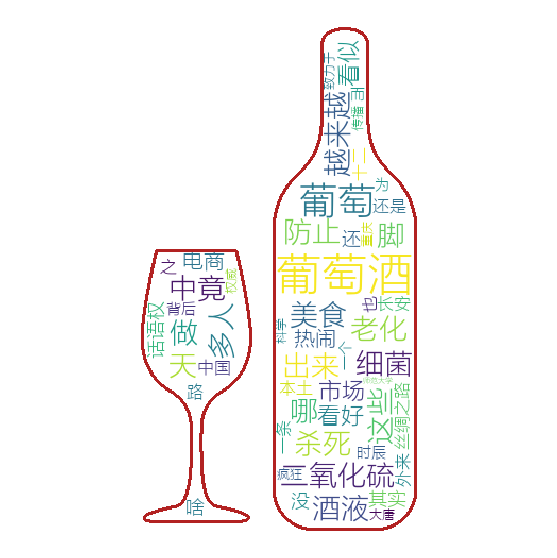

In [97]:
im = Image.open('design/wine_mask.png')
url = 'https://baike.baidu.com/item/%E8%91%A1%E8%90%84%E9%85%92' # 网页编码：ISO-8859-1
generate_word_cloud(
    word_counts=word_segmentation(
        clean_html_data(
            get_html_data(url)
        )[1]
    ), 
    image_mask=im)

#### 例子3：《政府工作报告（全文）》词云生成

In [ ]:
im = Image.open('design/china_map.png')
url = 'http://qstheory.cn/2018-03/22/c_1122577628.htm' # 网页编码：ISO-8859-1
generate_word_cloud(
    word_counts=word_segmentation(
        clean_html_data(
            get_html_data(url)
        )[1]
    ), 
    image_mask=im)

#### 例子4：《关于爱情》词云生成

In [ ]:
im = Image.open('design/heart.png')
url = 'https://baike.baidu.com/item/%E7%88%B1%E6%83%85/57' # 网页编码：ISO-8859-1
generate_word_cloud(
    word_counts=word_segmentation(
        clean_html_data(
            get_html_data(url)
        )[1]
    ), 
    image_mask=im)